# Gaussian Discriminant Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
def gauss(X, mu, sigma):
    n = len(X[0])
    res = np.zeros(len(X))
    for i,x in enumerate(X):
        res[i] = 1. / (np.sqrt(2**n * np.pi**n * np.linalg.det(sigma))) * \
        np.exp(-0.5 * (x-mu).dot(sigma.dot((x-mu).T)))
        
    return res


def gda(X, y):
    phi = np.mean(y)
    mu1 = np.mean(X[np.where(y==1)[0]], axis=0)
    mu2 = np.mean(X[np.where(y==0)[0]], axis=0)
    mu = (1-y) * mu2 + y * mu1
    sigma = ((X-mu).T).dot(X-mu) / X.shape[0]
    return phi, mu1, mu2, sigma


def predict(x, phi, mu1, mu2, sigma):
    p_xy1 = gauss(x, mu1, sigma)
    p_xy0 = gauss(x, mu2, sigma)
    prob1 = p_xy1 * phi / (p_xy1 * phi + p_xy0 * (1 - phi))
    prob2 = p_xy0 * (1-phi) / (p_xy1 * phi + p_xy0 * (1 - phi))
    target = np.zeros(x.shape[0])
    target[np.where(prob1 > prob2)] = 1
    return target, prob1, prob2

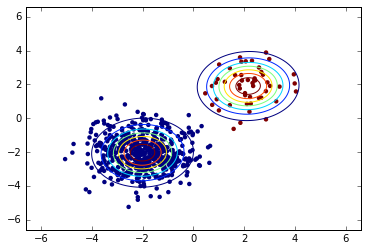

In [3]:
N1 = 50
N2 = 500
X1 = np.random.randn(N1,2) + np.array([2,2])
X2 = np.random.randn(N2,2) + np.array([-2,-2])
Y = np.concatenate([np.ones(N1),np.zeros(N2)])[:,None]
X = np.vstack([X1,X2])

phi, mu1, mu2, sigma = gda(X,Y)
gx = np.linspace(-6., 6., 500)
gy = np.linspace(-6., 6., 500)

z1 = np.zeros((len(gx),len(gy)))
for i in range(len(gx)):
    for j in range(len(gy)):
        z1[i, j] = gauss([[gx[i],gy[j]]], mu1, sigma)
z1 = z1.T
plt.contour(gx, gy, z1)
z2 = np.zeros((len(gx),len(gy)))
for i in range(len(gx)):
    for j in range(len(gy)):
        z2[i, j] = gauss([[gx[i],gy[j]]], mu2, sigma)
z2 = z2.T
plt.contour(gx, gy, z2)
plt.scatter(X[:,0],X[:,1], c = Y[:,0], edgecolors= 'none')
plt.show()

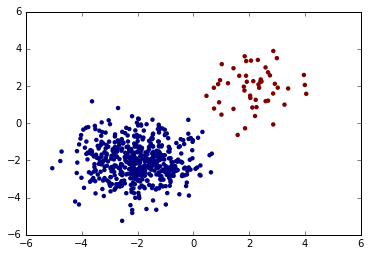

In [4]:
y_pred = predict(X, phi, mu1, mu2, sigma)
plt.scatter(X[:,0],X[:,1], c = y_pred[0], edgecolors= 'none')
plt.show()